In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

from scipy import stats  

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [22]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
# Use the inspect() to view the tables and columns for easier work in the analysis
inspector = inspect(engine)

In [25]:
#Get the table names
inspector.get_table_names()

['measurement', 'station']

In [30]:
# Get the column names for 'station' table
station_columns = inspector.get_columns('station')
for record_s in station_columns:
    print(record_s['name'], record_s["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [31]:
# Get the column names for 'measurement' table
measurement_columns = inspector.get_columns('measurement')
for record in measurement_columns:
    print(record['name'], record["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent_date


'2017-08-23'

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_bef_last_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d').date() - dt.timedelta(days=365)
print(f"One year ago from the last date is: {year_bef_last_date}")

One year ago from the last date is: 2016-08-23


In [57]:
# Perform a query to retrieve the data and precipitation scores (date and prcp)
precipitation_data = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date >= year_bef_last_date).\
    group_by(Measurement.date).all()

# Show the precipitation data
precipitation_data

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [64]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_data_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prec_data_df.set_index('Date', inplace=True) #Drop the numeric index

# Show the DataFrame
prec_data_df.head(10)


,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


Text(0, 0.5, 'Inches')


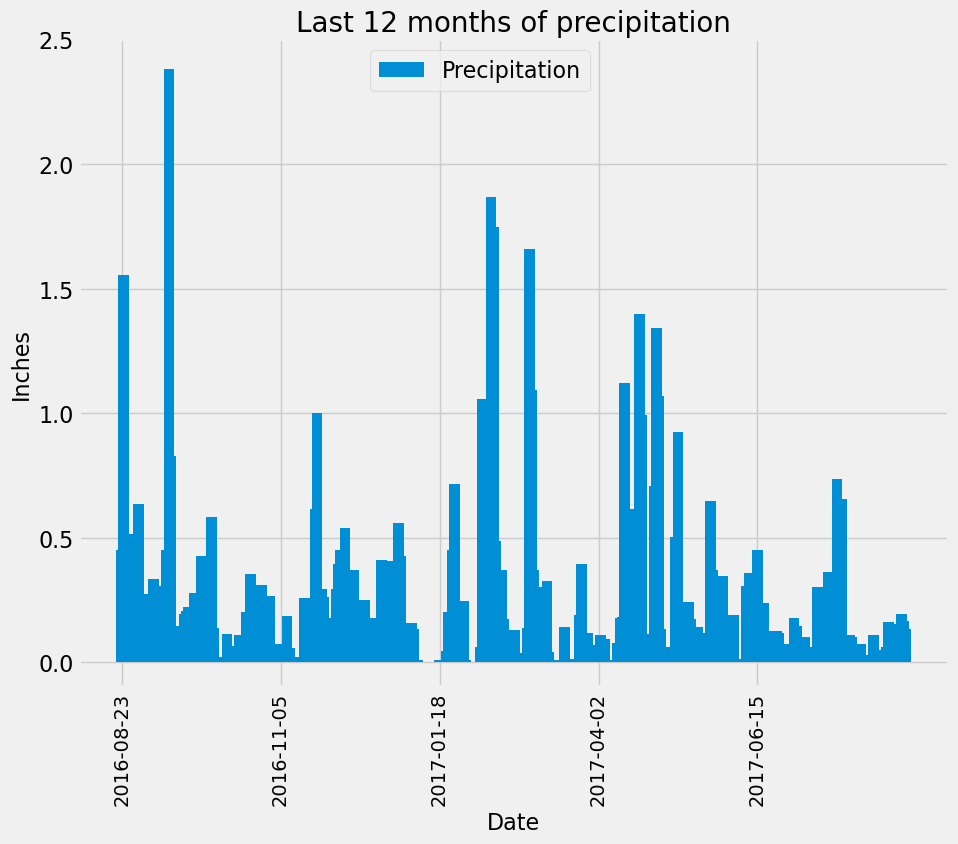

In [133]:
# Use Pandas Plotting with Matplotlib to plot the data
# Create the bar plot
ax = prec_data_df.plot(kind='bar', width=5, figsize=(10,8))

# Set the position of the x-axis ticks, and the rotation
dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(rotation=90)

# Set values of y-axis
#yticks = ['0', '1', '2', '3', '4', '5', '6', '7']
#plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], yticks)

# Set the number of ticks on the x-axis to 5
plt.locator_params(axis='x', nbins=5)

# Set the number of ticks on y-axis 
plt.locator_params(axis='y', nbins=8)

# Set the font size of y-axis tick
ax.tick_params(axis='y', labelsize=16)

# Set your limits
plt.xlim(-20,385)
plt.ylim(-0.10,2.5)

#Add a grid
ax.grid(True)

# Add a legend and adjust the position, add title, and labels for x and y axis.
plt.legend(bbox_to_anchor=(.6,1), fontsize="16")
plt.title("Last 12 months of precipitation", size=20)
plt.xlabel("Date", size=16)
plt.ylabel("Inches", size=16)

# Add the text above the plot
print(f"Text(0, 0.5, 'Inches')")

#Save the figure if needed
plt.savefig("output_data/PrecipitationChart.png")

# Show the Graph
plt.show()


In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_data_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [115]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [116]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Show the array
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [124]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get most active station id
most_active = most_active_stations[0][0]

temps_most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

# Show the most active station temps
temps_most_active_station

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

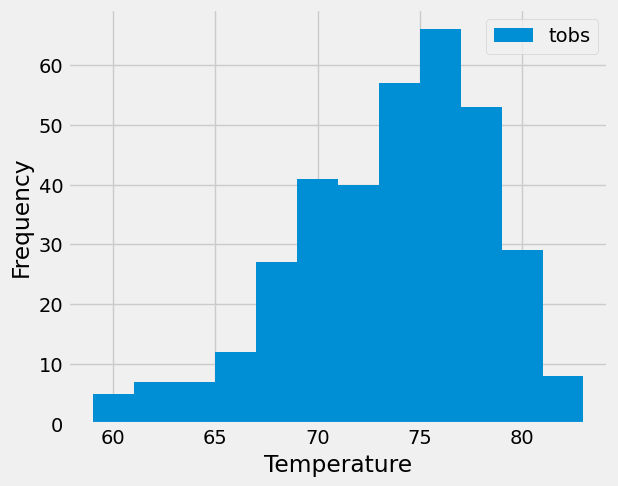

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()